# 월드컵 데이터 분석
- data 출처 : https://www.kaggle.com/abecklas/fifa-world-cup

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
data = pd.read_csv('./WorldCups.csv',decimal=',')
data.head()

,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590.549
1,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,363.000
2,1938,France,Italy,Hungary,Brazil,Sweden,84,15,18,375.700
3,1950,Brazil,Uruguay,Brazil,Sweden,Spain,88,13,22,1.045.246
4,1954,Switzerland,Germany FR,Hungary,Austria,Uruguay,140,16,26,768.607


### 역대 관중 수 출력하기.
- Year, Attendance col 출력

In [ ]:
df = data[['Year','Attendance']]
df['Attendance']  = df['Attendance'].astype(str)
df['Attendance'] = df['Attendance'].apply(lambda x : x.replace('.','')).astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Year        20 non-null     int64
 1   Attendance  20 non-null     int64
dtypes: int64(2)
memory usage: 448.0 bytes


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


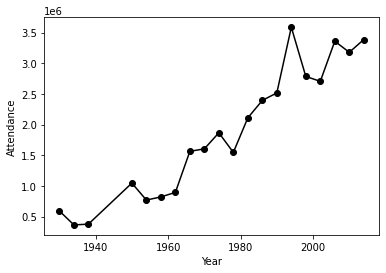

In [ ]:
fig, ax = plt.subplots()
ax.plot(df['Year'],df['Attendance'],marker = 'o',color ='k')
ax.set_xlabel('Year')
ax.set_ylabel('Attendance')
fig.show()

### 경기당 득점 수 분석

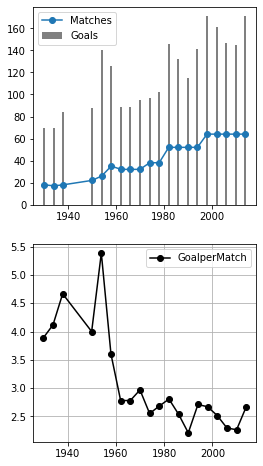

In [ ]:
data['Goalpermatch'] = data['GoalsScored'] / data['MatchesPlayed']
fig ,axes = plt.subplots(2,1,figsize=(4,8))
axes[0].bar(data['Year'],data['GoalsScored'],color='grey',label='Goals')
axes[0].plot(data['Year'],data['MatchesPlayed'],marker='o',label='Matches')
axes[0].legend()

axes[1].plot(data['Year'],data['Goalpermatch'],'k-o',label='GoalperMatch')
axes[1].legend()
axes[1].grid(True)
fig.show()

# WorldCupMatches Data
- 역대 월드컵 골 넣은 나라 순위

In [58]:
data = pd.read_csv('./WorldCupMatches.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4572 entries, 0 to 4571
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Year                  852 non-null    float64
 1   Datetime              852 non-null    object 
 2   Stage                 852 non-null    object 
 3   Stadium               852 non-null    object 
 4   City                  852 non-null    object 
 5   Home Team Name        852 non-null    object 
 6   Home Team Goals       852 non-null    float64
 7   Away Team Goals       852 non-null    float64
 8   Away Team Name        852 non-null    object 
 9   Win conditions        852 non-null    object 
 10  Attendance            850 non-null    float64
 11  Half-time Home Goals  852 non-null    float64
 12  Half-time Away Goals  852 non-null    float64
 13  Referee               852 non-null    object 
 14  Assistant 1           852 non-null    object 
 15  Assistant 2          

#### 데이터 전처리

In [59]:
data.replace({'Home Team Name':{'Germany FR':'Germany'}},inplace=True)
data.replace('C�te d\'Ivoire', 'Côte d\'Ivoire',inplace=True)
data.replace('rn">Bosnia and Herzegovina', 'Bosnia and Herzegovina',inplace=True)
data.replace('rn">Serbia and Montenegro', 'Serbia and Montenegro',inplace=True)
data.replace('rn">Republic of Ireland', 'Republic of Ireland',inplace=True)
data.replace('rn">Trinidad and Tobago', 'Trinidad and Tobago',inplace=True)
data.replace('rn">United Arab Emirates', 'United Arab Emirates',inplace=True)
data.replace('Soviet Union', 'Russia',inplace=True)


# 중복 데이터 제거
dupli = data.duplicated()
# print(dupli)
print(len(dupli[dupli==True]))
data = data.drop_duplicates()

3735


In [60]:
home_team = data.groupby('Home Team Name')['Home Team Goals'].sum()
away_team = data.groupby('Away Team Name')['Away Team Goals'].sum()
print(home_team)
print(away_team)

Home Team Name
Algeria                   5.0
Angola                    0.0
Argentina               109.0
Australia                 7.0
Austria                  31.0
                        ...  
United Arab Emirates      0.0
Uruguay                  62.0
Wales                     2.0
Yugoslavia               42.0
Zaire                     0.0
Name: Home Team Goals, Length: 76, dtype: float64
Away Team Name
Algeria                  8.0
Angola                   1.0
Argentina               22.0
Australia                4.0
Austria                 12.0
                        ... 
United Arab Emirates     2.0
Uruguay                 18.0
Wales                    2.0
Yugoslavia              18.0
Zaire                    0.0
Name: Away Team Goals, Length: 82, dtype: float64


In [61]:
#  결측 데이터 채우기
goal_per_country = pd.concat([home_team,away_team],axis = 1).fillna(0)
goal_per_country.isna()

,Home Team Goals,Away Team Goals
Algeria,False,False
Angola,False,False
Argentina,False,False
Australia,False,False
Austria,False,False
...,...,...
Egypt,False,False
El Salvador,False,False
Germany FR,False,False
Israel,False,False


In [65]:
total = (goal_per_country['Home Team Goals'] + goal_per_country['Away Team Goals']).astype(int)
total.sort_values(ascending=False, inplace = True)
total

Brazil                 221
Germany                192
Argentina              131
Italy                  128
France                 106
                      ... 
Canada                   0
China PR                 0
Dutch East Indies        0
Trinidad and Tobago      0
Zaire                    0
Length: 82, dtype: int64

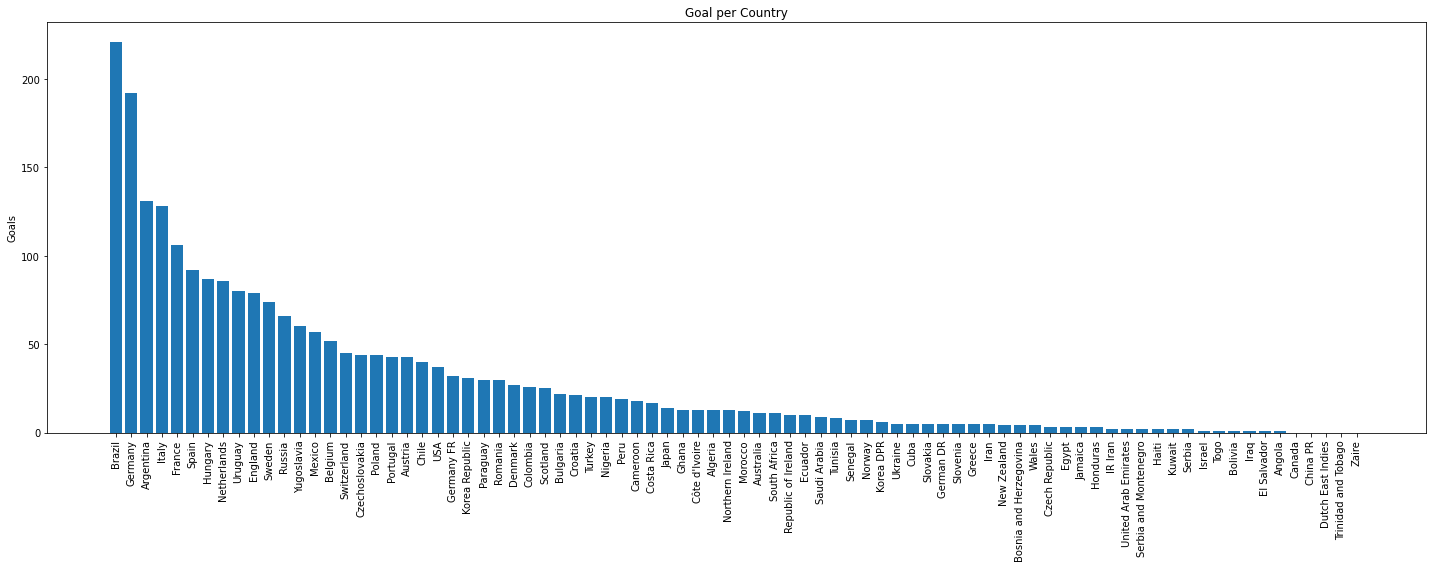

In [87]:
fig, ax = plt.subplots(figsize = (20,8))
ax.bar(total.index, total.values)
ax.set_title('Goal per Country')
ax.set_ylabel('Goals')
plt.xticks(rotation = 90)
plt.tight_layout()
fig.show()